In [1]:
##############################################################################################################
# DESCRIPTION: 
#              
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/"

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 200 # 600 #10000
hyperparams.BATCH_SIZE = 16
hyperparams.START_NEURONS = 8 # UNET
hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0100_1000"
SAVED_MODEL = "0100_1000-64-unet-xn2"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', SAVED_MODEL))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898 
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248 

#from tensorflow.keras.optimizers import Adam
#hyperparams.OPTIMIZER = Adam(learning_rate=0.0001)
#from tensorflow.keras.optimizers import Nadam
#hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)
from tensorflow.keras.optimizers import RMSprop
hyperparams.OPTIMIZER = RMSprop(learning_rate = 0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelC as train
import ReportsK as reports
import UnetI as model_factory

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15382567051643014340
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1820160000
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13320294724091091265
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
]
Tensorflow version: 2.6.0
Keras Version: 2.6.0
GPU is available


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
##################
# MODEL DEFINITION
##################

model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Loss=mean_absolute_error
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 8)    80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 8)    584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 8)    0           conv2d_1[0][0]                   
_____________________________________________________________________

{'name': 'RMSprop',
 'learning_rate': 0.0001,
 'decay': 0.0,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

In [6]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/
Noisy files:8738
Nitid files:8738
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/validation/
Noisy files:2208
Nitid files:2208


In [7]:
##################
# TRAIN MODEL
##################
hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience = 150 )

Epoch 1/200
547/547 [==============================] - 17s 22ms/step - loss: 0.0676 - val_loss: 0.0275
Epoch 2/200
547/547 [==============================] - 11s 21ms/step - loss: 0.0324 - val_loss: 0.0251
Epoch 3/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0285 - val_loss: 0.0229
Epoch 4/200
547/547 [==============================] - 11s 21ms/step - loss: 0.0270 - val_loss: 0.0290
Epoch 5/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0263 - val_loss: 0.0220
Epoch 6/200
547/547 [==============================] - 11s 21ms/step - loss: 0.0258 - val_loss: 0.0231
Epoch 7/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0255 - val_loss: 0.0213
Epoch 8/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0253 - val_loss: 0.0254
Epoch 9/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0249 - val_loss: 0.0230
Epoch 10/200
547/547 [==============================] - 12s 22ms/step - l

Epoch 80/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0199 - val_loss: 0.0222
Epoch 81/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0197 - val_loss: 0.0203
Epoch 82/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0197 - val_loss: 0.0218
Epoch 83/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0197 - val_loss: 0.0195
Epoch 84/200
547/547 [==============================] - 12s 22ms/step - loss: 0.0196 - val_loss: 0.0224
Epoch 85/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0196 - val_loss: 0.0191
Epoch 86/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0196 - val_loss: 0.0199
Epoch 87/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0196 - val_loss: 0.0198
Epoch 88/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0196 - val_loss: 0.0224
Epoch 89/200
547/547 [==============================] - 12s 21ms

547/547 [==============================] - 12s 21ms/step - loss: 0.0178 - val_loss: 0.0222
Epoch 159/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0179 - val_loss: 0.0229
Epoch 160/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0178 - val_loss: 0.0196
Epoch 161/200
547/547 [==============================] - 12s 22ms/step - loss: 0.0178 - val_loss: 0.0220
Epoch 162/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0178 - val_loss: 0.0205
Epoch 163/200
547/547 [==============================] - 11s 21ms/step - loss: 0.0178 - val_loss: 0.0212
Epoch 164/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0178 - val_loss: 0.0202
Epoch 165/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0179 - val_loss: 0.0212
Epoch 166/200
547/547 [==============================] - 12s 21ms/step - loss: 0.0178 - val_loss: 0.0238
Epoch 167/200
547/547 [==============================] - 11s 21ms/ste

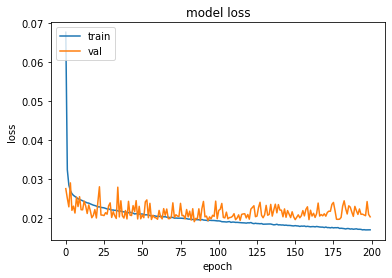

In [8]:
##################
# REPORTS
##################

reports.plotHistory( hist )

In [9]:
model.save(os.path.abspath(os.path.join('../../../saves/', SAVED_MODEL)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-unet-xn2\assets


In [10]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Images count =2208
Best RMSENZ  =2007 (0.91)
Best MAENZ   =1993 (0.90)
Best Accuracy=1933 (0.88)
RMSE-NZ  Pred=0.0239  Noisy=0.0943
MAE-NZ   Pred=0.0203  Noisy=0.0903
PSNR     Pred=20.2 dB Noisy=9.4 dB
Accuracy Pred=0.40    Noisy=0.09
SSM      Pred=0.93    Noisy=0.62
HOG MSE  Pred=0.09    Noisy=0.12


In [11]:
reports.saveMetrics( DEST_TESTS, SAVED_MODEL, predictions_headers, predictions_metrics )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test/
Noisy files:15
Nitid files:15
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_13_nitid_idx134.tif


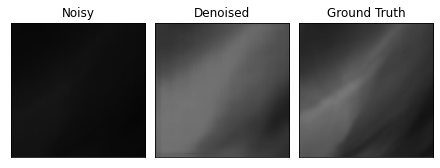

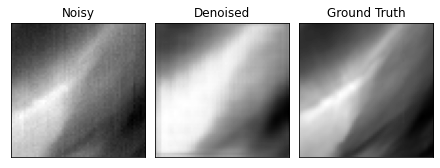

RMSE-NZ  Pred=0.0838  Noisy=0.2105 BEST
MAE-NZ   Pred=0.0798  Noisy=0.1954 BEST
PSNR     Pred=14.9 dB Noisy=6.9 dB BEST
Accuracy Pred=0.02    Noisy=0.00 BEST
SSM      Pred=0.89    Noisy=0.28
HOG MSE  Pred=0.04    Noisy=0.13
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_14_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_00_02_14_nitid_idx134.tif


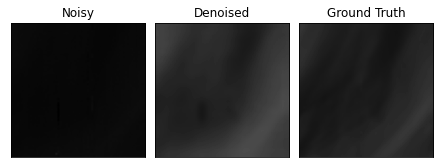

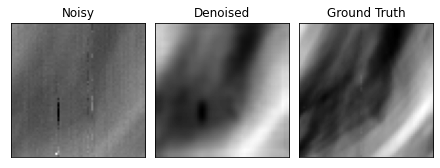

RMSE-NZ  Pred=0.0577  Noisy=0.0994 BEST
MAE-NZ   Pred=0.0538  Noisy=0.0953 BEST
PSNR     Pred=11.7 dB Noisy=7.0 dB BEST
Accuracy Pred=0.01    Noisy=0.00 BEST
SSM      Pred=0.91    Noisy=0.33
HOG MSE  Pred=0.03    Noisy=0.16
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_00_0_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_00_0_nitid_idx017.tif


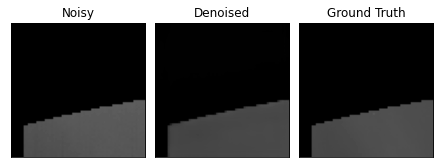

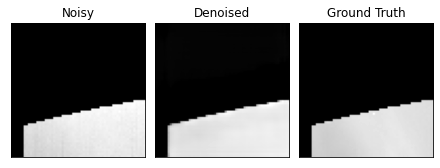

RMSE-NZ  Pred=0.0148  Noisy=0.0388 BEST
MAE-NZ   Pred=0.0092  Noisy=0.0376 BEST
PSNR     Pred=27.4 dB Noisy=19.0 dB BEST
Accuracy Pred=0.73    Noisy=0.00 BEST
SSM      Pred=0.91    Noisy=0.91
HOG MSE  Pred=0.20    Noisy=0.07
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0317_03_01_4_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0317_03_01_4_nitid_idx017.tif


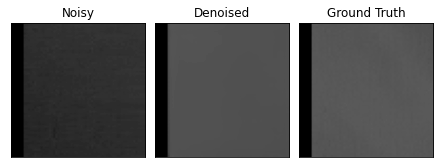

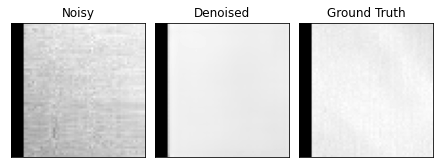

RMSE-NZ  Pred=0.0252  Noisy=0.1632 BEST
MAE-NZ   Pred=0.0218  Noisy=0.1622 BEST
PSNR     Pred=23.1 dB Noisy=6.9 dB BEST
Accuracy Pred=0.20    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.80
HOG MSE  Pred=0.01    Noisy=0.01
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_4_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_4_nitid_idx134.tif


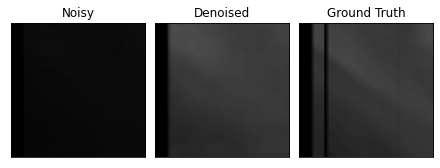

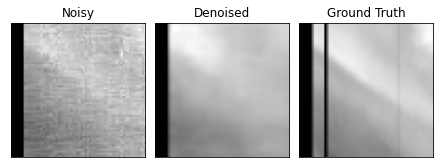

RMSE-NZ  Pred=0.0343  Noisy=0.1704 BEST
MAE-NZ   Pred=0.0164  Noisy=0.1661 BEST
PSNR     Pred=18.5 dB Noisy=4.6 dB BEST
Accuracy Pred=0.49    Noisy=0.00 BEST
SSM      Pred=0.88    Noisy=0.32
HOG MSE  Pred=0.04    Noisy=0.07
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_03_02_5_nitid_idx134.tif


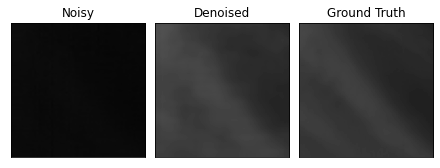

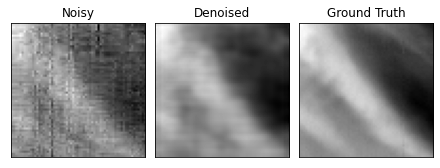

RMSE-NZ  Pred=0.0259  Noisy=0.1649 BEST
MAE-NZ   Pred=0.0238  Noisy=0.1619 BEST
PSNR     Pred=20.6 dB Noisy=4.6 dB BEST
Accuracy Pred=0.09    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.31
HOG MSE  Pred=0.08    Noisy=0.35
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_01_12_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_01_12_nitid_idx017.tif


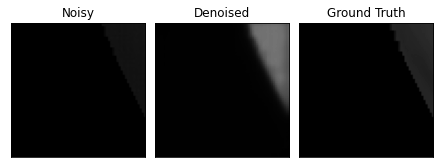

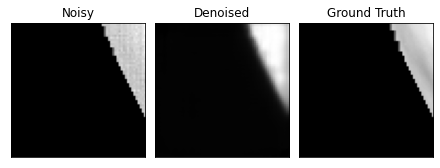

RMSE-NZ  Pred=0.0868  Noisy=0.0366 WORST
MAE-NZ   Pred=0.0358  Noisy=0.0184 WORST
PSNR     Pred=6.5 dB Noisy=14.0 dB WORST
Accuracy Pred=0.80    Noisy=0.74 BEST
SSM      Pred=0.66    Noisy=0.61
HOG MSE  Pred=0.21    Noisy=0.02
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_02_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0332_00_02_5_nitid_idx134.tif


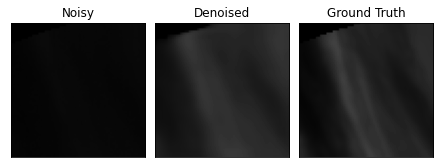

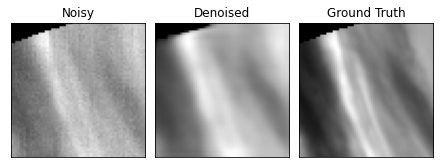

RMSE-NZ  Pred=0.0236  Noisy=0.1089 BEST
MAE-NZ   Pred=0.0206  Noisy=0.0979 BEST
PSNR     Pred=20.6 dB Noisy=7.3 dB BEST
Accuracy Pred=0.20    Noisy=0.01 BEST
SSM      Pred=0.91    Noisy=0.35
HOG MSE  Pred=0.02    Noisy=0.13
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0343_03_01_8_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0343_03_01_8_nitid_idx017.tif


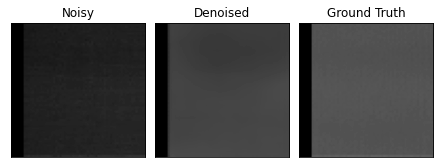

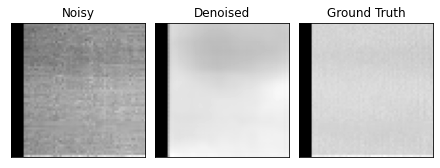

RMSE-NZ  Pred=0.0680  Noisy=0.1952 BEST
MAE-NZ   Pred=0.0621  Noisy=0.1947 BEST
PSNR     Pred=15.2 dB Noisy=6.0 dB BEST
Accuracy Pred=0.09    Noisy=0.00 BEST
SSM      Pred=0.94    Noisy=0.75
HOG MSE  Pred=0.03    Noisy=0.02
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_11_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_11_nitid_idx134.tif


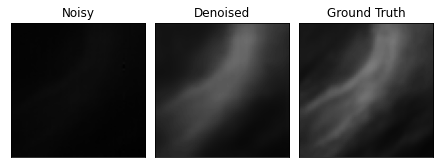

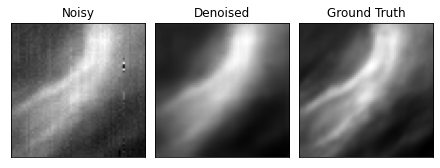

RMSE-NZ  Pred=0.0316  Noisy=0.1931 BEST
MAE-NZ   Pred=0.0260  Noisy=0.1660 BEST
PSNR     Pred=23.7 dB Noisy=8.0 dB BEST
Accuracy Pred=0.17    Noisy=0.00 BEST
SSM      Pred=0.92    Noisy=0.31
HOG MSE  Pred=0.05    Noisy=0.09
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_12_nitid_idx134.tif


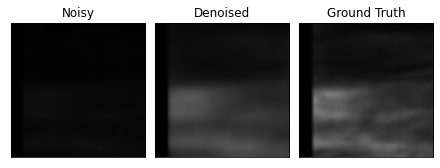

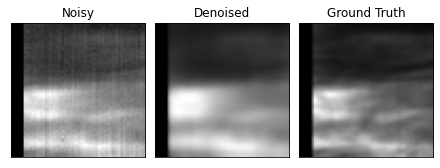

RMSE-NZ  Pred=0.0349  Noisy=0.1742 BEST
MAE-NZ   Pred=0.0224  Noisy=0.1438 BEST
PSNR     Pred=23.1 dB Noisy=9.1 dB BEST
Accuracy Pred=0.38    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.39
HOG MSE  Pred=0.02    Noisy=0.05
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_13_nitid_idx134.tif


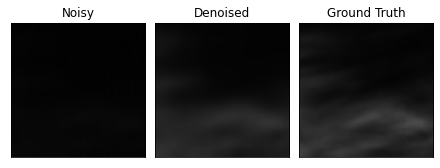

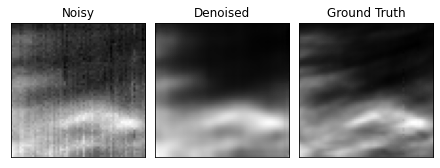

RMSE-NZ  Pred=0.0269  Noisy=0.0979 BEST
MAE-NZ   Pred=0.0210  Noisy=0.0772 BEST
PSNR     Pred=20.6 dB Noisy=9.4 dB BEST
Accuracy Pred=0.31    Noisy=0.04 BEST
SSM      Pred=0.93    Noisy=0.58
HOG MSE  Pred=0.05    Noisy=0.12
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_11_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_11_nitid_idx146.tif


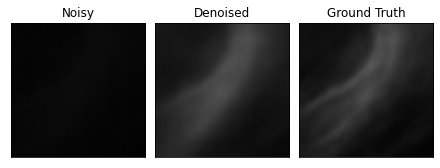

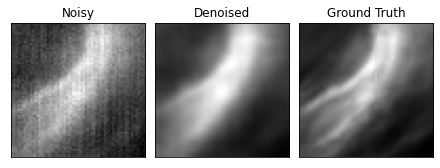

RMSE-NZ  Pred=0.0207  Noisy=0.1221 BEST
MAE-NZ   Pred=0.0174  Noisy=0.1019 BEST
PSNR     Pred=24.2 dB Noisy=8.8 dB BEST
Accuracy Pred=0.28    Noisy=0.02 BEST
SSM      Pred=0.93    Noisy=0.36
HOG MSE  Pred=0.05    Noisy=0.14
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_8_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_03_8_nitid_idx146.tif


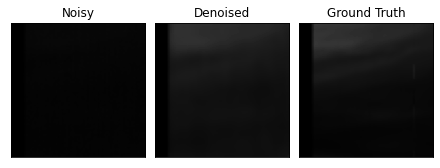

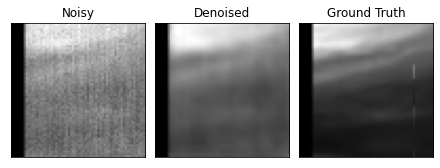

RMSE-NZ  Pred=0.0222  Noisy=0.0710 BEST
MAE-NZ   Pred=0.0183  Noisy=0.0512 BEST
PSNR     Pred=20.0 dB Noisy=10.0 dB BEST
Accuracy Pred=0.32    Noisy=0.21 BEST
SSM      Pred=0.87    Noisy=0.45
HOG MSE  Pred=0.04    Noisy=0.10
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_0_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_0_nitid_idx134.tif


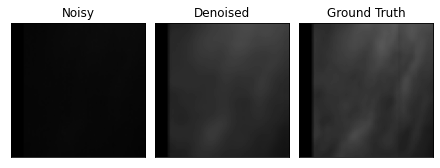

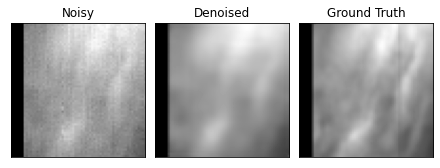

RMSE-NZ  Pred=0.0292  Noisy=0.1835 BEST
MAE-NZ   Pred=0.0255  Noisy=0.1780 BEST
PSNR     Pred=21.4 dB Noisy=5.5 dB BEST
Accuracy Pred=0.15    Noisy=0.00 BEST
SSM      Pred=0.94    Noisy=0.31
HOG MSE  Pred=0.03    Noisy=0.03
******************************************************


In [12]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = \
    dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid = \
    dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )